In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
import numpy as np
import matplotlib.pyplot as plt
import timeit

2025-11-09 21:42:03.199640: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

print("Train: ", X_train.shape, y_train_flat.shape)
print("Test: ", X_test.shape, y_test_flat.shape)

X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

print("Train: ", X_train_scaled.shape, y_train_flat.shape)
print("Test: ", X_test_scaled.shape, y_test_flat.shape)

Train:  (50000, 32, 32, 3) (50000,)
Test:  (10000, 32, 32, 3) (10000,)
Train:  (50000, 3072) (50000,)
Test:  (10000, 3072) (10000,)


PCA components for 95% variance:  221


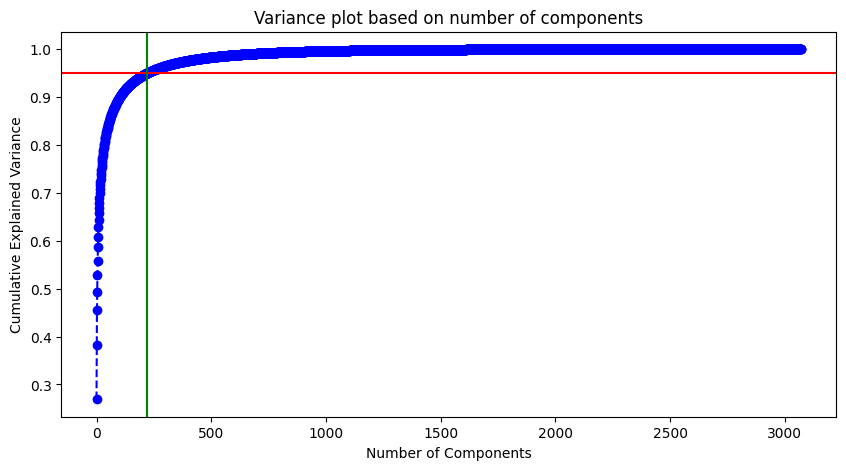

In [3]:
pca = PCA()
pca.fit(X_train_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("PCA components for 95% variance: ", n_components)
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance plot based on number of components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=n_components, color='g', linestyle='-')
plt.show()

pca = PCA(n_components)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [4]:
print('\n\n NON-PCA IMPLEMENTATION\n\n')

start_time_all = timeit.default_timer()
start_time = timeit.default_timer()
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_scaled, y_train_flat)
pred1 = knn1.predict(X_test_scaled)
acc1 = accuracy_score(y_test_flat, pred1)

elapsed = timeit.default_timer() - start_time
print('Time elapsed KNN, K=1: ' + str(elapsed))

start_time = timeit.default_timer()
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, y_train_flat)
pred3 = knn3.predict(X_test_scaled)
acc3 = accuracy_score(y_test_flat, pred3)

elapsed = timeit.default_timer() - start_time
print('Time elapsed KNN, K=3: ' + str(elapsed))

start_time = timeit.default_timer()
nc = NearestCentroid()
nc.fit(X_train_scaled, y_train_flat)
prednc = nc.predict(X_test_scaled)
acc_nc = accuracy_score(y_test_flat, prednc)

elapsed = timeit.default_timer() - start_time
print('Time elapsed NC: ' + str(elapsed))

elapsed_all = timeit.default_timer() - start_time_all

print("\n---Accuracy Scores without PCA---\n")
print(f"KNN with PCA (k=1): {acc1:.3f}")
print(f"KNN with PCA(k=3): {acc3: .3f}")
print(f"Nearest Centroid with PCA: {acc_nc: .3f}")



 NON-PCA IMPLEMENTATION


Time elapsed KNN, K=1: 19.45033678600157
Time elapsed KNN, K=3: 18.096338420000393
Time elapsed NC: 1.5408216600008018

---Accuracy Scores without PCA---

KNN with PCA (k=1): 0.357
KNN with PCA(k=3):  0.331
Nearest Centroid with PCA:  0.281


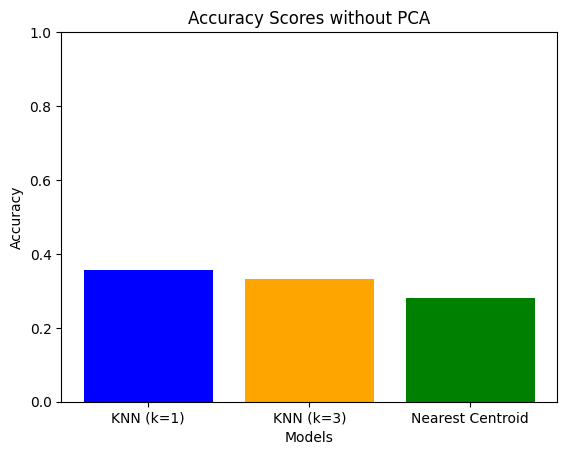

In [5]:
labels = ['KNN (k=1)', 'KNN (k=3)', 'Nearest Centroid']
accuracies = [acc1, acc3, acc_nc]

plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title('Accuracy Scores without PCA')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

In [6]:
print('\n\n PCA IMPLEMENTATION \n \n')
start_time_all = timeit.default_timer()
start_time = timeit.default_timer()
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_pca, y_train_flat)
pred1 = knn1.predict(X_test_pca)
acc1 = accuracy_score(y_test_flat, pred1)

elapsed = timeit.default_timer() - start_time
print('Time elapsed KNN, K=1: ' + str(elapsed))

start_time = timeit.default_timer()
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_pca, y_train_flat)
pred3 = knn3.predict(X_test_pca)
acc3 = accuracy_score(y_test_flat, pred3)

elapsed = timeit.default_timer() - start_time
print('Time elapsed KNN, K=3: ' + str(elapsed))

start_time = timeit.default_timer()
nc = NearestCentroid()
nc.fit(X_train_pca, y_train_flat)
prednc = nc.predict(X_test_pca)
acc_nc = accuracy_score(y_test_flat, prednc)

elapsed = timeit.default_timer() - start_time
print('Time elapsed NC: ' + str(elapsed))

elapsed_all = timeit.default_timer() - start_time_all

print("\n---Accuracy Scores with PCA---\n")
print(f"KNN with PCA (k=1): {acc1:.3f}")
print(f"KNN with PCA(k=3): {acc3: .3f}")
print(f"Nearest Centroid with PCA: {acc_nc: .3f}")



 PCA IMPLEMENTATION 
 

Time elapsed KNN, K=1: 1.4506558909997693
Time elapsed KNN, K=3: 1.5084449470014079
Time elapsed NC: 0.10812281600010465

---Accuracy Scores with PCA---

KNN with PCA (k=1): 0.375
KNN with PCA(k=3):  0.351
Nearest Centroid with PCA:  0.281


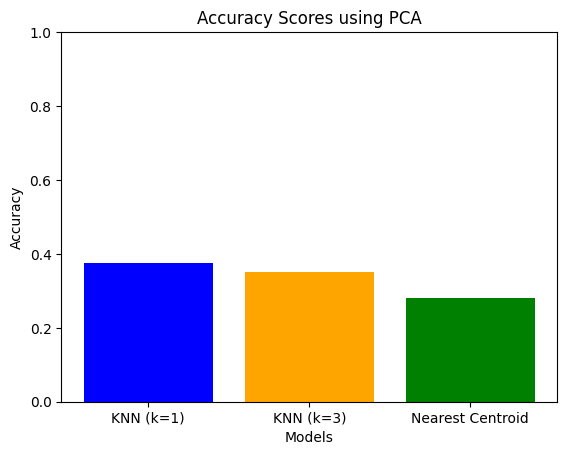

In [7]:
labels = ['KNN (k=1)', 'KNN (k=3)', 'Nearest Centroid']
accuracies = [acc1, acc3, acc_nc]

plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title('Accuracy Scores using PCA')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()